# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header = 0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

We have chosen the cesus data. Our label will be education, so we aim to predict the highest level of education one needs based on other features in the dataset such as occuupation or  work class etc. We intend for our features to be all of the remaining columns that are not our label 'education'. This is a supervised learning problem and a multi class classification problem because we're predicting a category based on other features (categorical data). This is an important problem because companies or the government can make better plans to minimize the education gap or the wealth gap. Policymakers can also create policies to support social mobility and lessen educational gaps by understanding the factors that affect education levels Organizations and sectors can also use  this data to schedule employee training sessions and pinpoint areas where their workforce lacks certain skills.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
print("Shape of Census Data:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData Types in dataset\n", df.dtypes)
print("\nMissing Values\n", df.isnull().sum())
#Summary statistics
print("\nDesc of Census Data\n", df.describe())

Shape of Census Data: (32561, 15)

Column names:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

Data Types in dataset
 age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

Missing Values
 age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-g

Now that we have a better understanding of our data, we can begin taking some steps to prepare our data for our model. We can address missing values by substituting their values with their means and we can also one hot encode our categorical columns as we have a couple in our dataset. We will lastly check for irrelevant features and remove those where we see fit. Below, we carry out this plan. 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

We looked into the data and made the decision to keep the following features: age, hours worked per week, education, and a number of categorical factors including workclass, occupation, country of origin, and others. Features that had a higher number of missing values as well as unnecessary dummy variables used to measure missing data have been removed from our data. To make sure there is no longer any missing data in these columns, the values for age and hours worked per week have been taken care of by imputing. We did this by using the mean for numerical features, in order to prepare the data for modeling. To prepare categorical features for the methods, they will be one-hot encoded. Decision Trees will be the main model we will use. While K-Nearest Neighbors (KNN) was taken into consideration, its performance may be negatively affected by the high dimensionality of our data and thus our model may be affected.
The dataset needs to be divided into training and testing sets before we can begin to develop and assess our model. Next, we'll use the training data to train the Decision Tree model, and we'll assess its performance using metrics, but specifically by focusing on accuracy scores. To evaluate the model's stability and generalizability to data, we will tune our model's hyperparameters, including the tree's depth and min samplee leaf, based on the evaluation's findings to make our model better performing. The improved model will next be tested on our test data to make sure it performs well and that it can be generalizable.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Data Preparation

In [5]:
#First we check for missing values
missing_values = df.isnull().sum()
print(missing_values)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [6]:
#Cleaning Data Up


#we can keep track of missing values by making dummy variables that indicate whether values are missing in order to monitor  it in my dataset. 

#Determine Missing Values: To show if there is a missing value in the age
#column, we can add a new column named age_na. To represent missing values
#in the hours-per-week column, I will similarly construct a new column 
#called hours-per-week_na. If a row has missing values, these additional
#columns will say True; if not, they will say False.

df['age_na'] = df['age'].isna()  
df['hours-per-week_na'] = df['hours-per-week'].isna()  

#verifying 
print("Dummy Variables for Missingness:")
print(df[['age_na', 'hours-per-week_na']].head())

# replacing with mean, by doing this, it is so that the analysis and modeling are not adversely affected by the missing data.

df['age'].fillna(df['age'].mean(), inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].mean(), inplace=True)

# we can see if it has been handled
print("Missing values after imputation:")
print(df[['age', 'hours-per-week']].isna().sum())

df = df.dropna(subset=['workclass', 'occupation', 'native-country'])

_missing_values = df.isnull().sum()
print(_missing_values)

df['education_binary'] = df['education'].apply(lambda x: 1 if x in ['Bachelors', 'Masters', 'Doctorate'] else 0)
print("Education Binary Feature:")
print(df[['education', 'education_binary']].head())
#By condensing several categories into clear distinctions between higher
#and lower education levels, the creation of a binary feature for
#education may help the model.. Also, a binary feature makes it simple 
#to compare and analyze how greater education affects outcomes 
#like income or employment chances.

Dummy Variables for Missingness:
   age_na  hours-per-week_na
0   False              False
1   False              False
2   False              False
3   False              False
4   False              False
Missing values after imputation:
age               0
hours-per-week    0
dtype: int64
age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income_binary        0
age_na               0
hours-per-week_na    0
dtype: int64
Education Binary Feature:
   education  education_binary
0  Bachelors                 1
1  Bachelors                 1
2    HS-grad                 0
3       11th                 0
4  Bachelors                 1


In [7]:
# one-hot encoding preparation 

# first we want to find all columns of type object

to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country',
 'income_binary']

In [8]:
# inspecting possible num of values each column can have
df[to_encode].nunique()

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [9]:
# we find that native-country and occupation exceed 10 unique values. Occupation is less severe but it might be helpful to still get the top most frequence values in this column too. Native-country for sure poses a concern for one hot eocnidng since there are so many unique vals, so we will transform this column as well. 
top_10_NC = list(df['native-country'].value_counts().head(10).index)
top_10_OCC = list(df['occupation'].value_counts().head(10).index)

print("\ntop 10 most freq values in native country:\n",top_10_NC)
print("\ntop 10 most freq values in occupation:\n",top_10_OCC)


top 10 most freq values in native country:
 ['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico', 'Canada', 'India', 'El-Salvador', 'Cuba', 'England']

top 10 most freq values in occupation:
 ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing']


In [10]:
for value in top_10_NC:
    
    ## Create columns and their values
    df['native_country_'+ value] = np.where(df['native-country']==value,1,0)
    
    
# Remove the original column from df
df.drop(columns = 'native-country', inplace=True)


for value in top_10_OCC:
    
    ## Create columns and their values
    df['occupation_'+ value] = np.where(df['occupation']==value,1,0)
    
    
# Remove the original column from df
df.drop(columns = 'occupation', inplace=True)


# using pandas for remaining columns
df_workclass = pd.get_dummies(df['workclass'], prefix='workclass_')
df = df.join(df_workclass)
df.drop(columns = 'workclass', inplace=True)

df_ms = pd.get_dummies(df['marital-status'], prefix='marital_status_')
df = df.join(df_ms)
df.drop(columns = 'marital-status', inplace=True)

# not one-hot encoding relationship bc it does not seem relevant to our label
df_race = pd.get_dummies(df['race'], prefix='race_')
df = df.join(df_race)
df.drop(columns = 'race', inplace=True)

df_sex = pd.get_dummies(df['sex_selfID'], prefix='sex_selfID_')
df = df.join(df_sex)
df.drop(columns = 'sex_selfID', inplace=True)
 
df_income = pd.get_dummies(df['income_binary'], prefix='income_binary_')
df = df.join(df_income)
df.drop(columns = 'income_binary', inplace=True)


In [11]:
#verifying dataset
df.head()
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'relationship',
       'capital-gain', 'capital-loss', 'hours-per-week', 'age_na',
       'hours-per-week_na', 'education_binary', 'native_country_United-States',
       'native_country_Mexico', 'native_country_Philippines',
       'native_country_Germany', 'native_country_Puerto-Rico',
       'native_country_Canada', 'native_country_India',
       'native_country_El-Salvador', 'native_country_Cuba',
       'native_country_England', 'occupation_Prof-specialty',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Adm-clerical', 'occupation_Sales',
       'occupation_Other-service', 'occupation_Machine-op-inspct',
       'occupation_Transport-moving', 'occupation_Handlers-cleaners',
       'occupation_Farming-fishing', 'workclass__Federal-gov',
       'workclass__Local-gov', 'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__W

In [12]:
df.columns = df.columns.str.lower()

In [13]:
# went from 15 columns to 54 cols!
df.shape

(30162, 54)

In [14]:
# potentially build decision trees model
#df['education'].unique()

In [15]:
df = df.drop(columns = ['age_na', 'education-num','fnlwgt', 'relationship','hours-per-week_na','education_binary'])

In [16]:
df.head()

,age,education,capital-gain,capital-loss,hours-per-week,native_country_united-states,native_country_mexico,native_country_philippines,native_country_germany,native_country_puerto-rico,...,marital_status__widowed,race__amer-indian-inuit,race__asian-pac-islander,race__black,race__other,race__white,sex_selfid__female,sex_selfid__non-female,income_binary__<=50k,income_binary__>50k
0,39.0,Bachelors,2174,0,40.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,50.0,Bachelors,0,0,13.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,38.0,HS-grad,0,0,40.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,53.0,11th,0,0,40.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28.0,Bachelors,0,0,40.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


### Specifying our label and features for our model: 

In [17]:
y = df['education']
X = df.loc[:, df.columns != 'education']

In [40]:
X.columns # checking our features

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native_country_united-states', 'native_country_mexico',
       'native_country_philippines', 'native_country_germany',
       'native_country_puerto-rico', 'native_country_canada',
       'native_country_india', 'native_country_el-salvador',
       'native_country_cuba', 'native_country_england',
       'occupation_prof-specialty', 'occupation_exec-managerial',
       'occupation_adm-clerical', 'occupation_sales',
       'occupation_machine-op-inspct', 'occupation_farming-fishing',
       'workclass__local-gov', 'workclass__private', 'workclass__state-gov',
       'workclass__without-pay', 'marital_status__divorced',
       'marital_status__married-af-spouse',
       'marital_status__married-civ-spouse',
       'marital_status__married-spouse-absent',
       'marital_status__never-married', 'marital_status__separated',
       'race__amer-indian-inuit', 'race__asian-pac-islander', 'race__other',
       'sex_selfid__

# Building Decision Tree Model: 

In [19]:
# creating training and test data sets below

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [20]:
# verifying dimensions of training and test datasets
print(X_train.shape)
print(X_test.shape)

(21113, 47)
(9049, 47)


In [21]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf = 1, crit='entropy'):
#Creating the  DecisionTreeClassifier model object
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
# fitting model 
    model.fit(X_train, y_train)
# predictions on test data
    class_label_predictions = model.predict(X_test)   
# computing acc score
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

## Evaluating best hyperparameter values

In [22]:
max_depth_range = [2**i for i in range(10)] 
acc = []

print("Accuracy scores:")
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, depth = md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))
    
      

Accuracy scores:
Max Depth=1, accuracy score: 0.36600729362360485
Max Depth=2, accuracy score: 0.38379931484141894
Max Depth=4, accuracy score: 0.3962868825284562
Max Depth=8, accuracy score: 0.4075588462813571
Max Depth=16, accuracy score: 0.371090728257266
Max Depth=32, accuracy score: 0.29727041662062104
Max Depth=64, accuracy score: 0.29749143551773677
Max Depth=128, accuracy score: 0.2960548126864847
Max Depth=256, accuracy score: 0.2962758315836004
Max Depth=512, accuracy score: 0.29826500165764175


#### Visualizing our accuracy scores with diff max_depth values

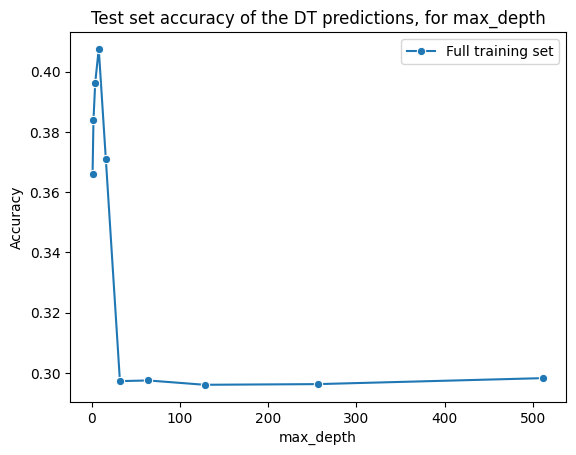

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')


plt.title('Test set accuracy of the DT predictions, for max_depth')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

Although not the best, we find that when max_depth = 8 and our min_samples_leaf = 1 (default value), we get the highest accuracy score of about 0.41. We will attempt increasing our accuracy score by tuning our min samples leaf hyperparameter. But first, we will run one more check on max_depth values to see if a value in between 8 and 16 produces slightly higher results.

In [24]:
new_max_depth = [7,8,9,10,13]
acc_1 = []

for md in new_max_depth:
    score_1 = train_test_DT(X_train, X_test, y_train, y_test, depth = md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score_1))
    acc_1.append(float(score_1))

Max Depth=7, accuracy score: 0.409105978561167
Max Depth=8, accuracy score: 0.4074483368327992
Max Depth=9, accuracy score: 0.41529450768040665
Max Depth=10, accuracy score: 0.4139683942977124
Max Depth=13, accuracy score: 0.3925295612774892


Although a very small improvement, we find that when min samples leaf = 1 and max_depth = 9, we get an accuracy score of about 0.42. Therefore, we will use this value for our max depth hyperparameter. 

In [25]:
leaf_range = [2, 4, 6,8, 10, 20, 30, 40, 50, 60, 70, 80, 82, 90, 100,150,200]
acc_2 = []

for i in leaf_range:
    score_2 = train_test_DT(X_train, X_test, y_train, y_test, depth = 9, leaf=i)
    print('leaf=' + str(i) + ', accuracy score: ' + str(score_2))
    acc_2.append(float(score_2))

leaf=2, accuracy score: 0.4138578848491546
leaf=4, accuracy score: 0.41452094154050173
leaf=6, accuracy score: 0.41651011161454304
leaf=8, accuracy score: 0.41717316830589013
leaf=10, accuracy score: 0.41761520610012154
leaf=20, accuracy score: 0.4170626588573323
leaf=30, accuracy score: 0.41606807382031163
leaf=40, accuracy score: 0.4138578848491546
leaf=50, accuracy score: 0.4135263565034811
leaf=60, accuracy score: 0.4159575643717538
leaf=70, accuracy score: 0.4147419604376174
leaf=80, accuracy score: 0.41441043209194384
leaf=82, accuracy score: 0.41441043209194384
leaf=90, accuracy score: 0.4107636202895348
leaf=100, accuracy score: 0.4107636202895348
leaf=150, accuracy score: 0.4104320919438612
leaf=200, accuracy score: 0.4074483368327992


Our best accuracy score when our depth = 9 and our leaf = 10 is 0.41765. This roughly gives our model an accuracy score of 0.42. Since our model's accuracy score is not at a value that we are satisfied with, we can check for feature importance and decide which features to remove based on their predicting power. 

In [26]:
# our current decision trees model with the 'best' hyperparameter values possible.
model_checking = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, min_samples_leaf = 10)
model_checking.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10)

#### Feature Importance Plot:

<AxesSubplot: >

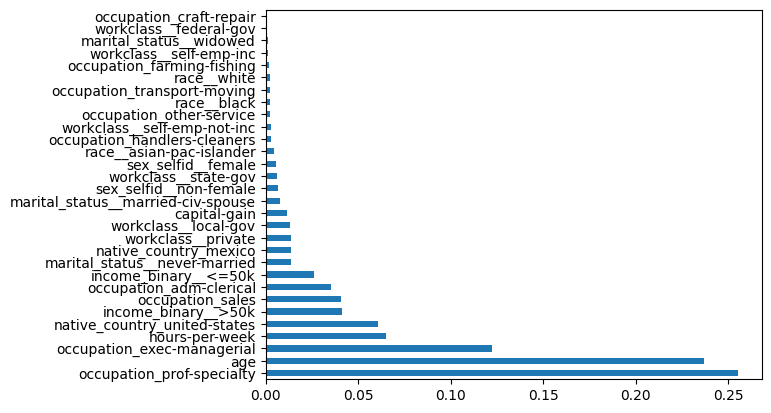

In [27]:
feat_importances = pd.Series(model_checking.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [28]:
X.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native_country_united-states', 'native_country_mexico',
       'native_country_philippines', 'native_country_germany',
       'native_country_puerto-rico', 'native_country_canada',
       'native_country_india', 'native_country_el-salvador',
       'native_country_cuba', 'native_country_england',
       'occupation_prof-specialty', 'occupation_craft-repair',
       'occupation_exec-managerial', 'occupation_adm-clerical',
       'occupation_sales', 'occupation_other-service',
       'occupation_machine-op-inspct', 'occupation_transport-moving',
       'occupation_handlers-cleaners', 'occupation_farming-fishing',
       'workclass__federal-gov', 'workclass__local-gov', 'workclass__private',
       'workclass__self-emp-inc', 'workclass__self-emp-not-inc',
       'workclass__state-gov', 'workclass__without-pay',
       'marital_status__divorced', 'marital_status__married-af-spouse',
       'marital_status__married-civ-

Above we find that occupation_craft-repair, workclass_federal-gov, martial_status_widowed, workclass_self-emp-inc, and occupating_farming-fishing, and 'race__white','occupation_transport-moving','race__black','occupation_other-service', 'workclass__self-emp-not-inc', and 'occupation_handlers-cleaners' provide pretty low levels of predictive power. We can try removing these as a starter to see if our accuracy score increases.

In [29]:
df_new = df = df.drop(columns = ['occupation_craft-repair', 'workclass__federal-gov','marital_status__widowed', 'workclass__self-emp-inc','race__white','occupation_transport-moving','race__black','occupation_other-service','workclass__self-emp-not-inc','occupation_handlers-cleaners'])

In [30]:
df_new.columns

Index(['age', 'education', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native_country_united-states', 'native_country_mexico',
       'native_country_philippines', 'native_country_germany',
       'native_country_puerto-rico', 'native_country_canada',
       'native_country_india', 'native_country_el-salvador',
       'native_country_cuba', 'native_country_england',
       'occupation_prof-specialty', 'occupation_exec-managerial',
       'occupation_adm-clerical', 'occupation_sales',
       'occupation_machine-op-inspct', 'occupation_farming-fishing',
       'workclass__local-gov', 'workclass__private', 'workclass__state-gov',
       'workclass__without-pay', 'marital_status__divorced',
       'marital_status__married-af-spouse',
       'marital_status__married-civ-spouse',
       'marital_status__married-spouse-absent',
       'marital_status__never-married', 'marital_status__separated',
       'race__amer-indian-inuit', 'race__asian-pac-islander', 'race__other',
       

In [31]:
# specifying our label and features again 
y_new = df_new['education']
X_new = df_new.loc[:, df.columns != 'education']

In [32]:
# specifying our training and testing data again 
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.30, random_state = 1234)

In [33]:
# creating new decision tree model
def train_test_DT_new(X_train, X_test, y_train, y_test, depth, leaf = 1, crit='entropy'):
#Creating the  DecisionTreeClassifier model object
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
# fitting model 
    model.fit(X_train, y_train)
# predictions on test data
    class_label_predictions = model.predict(X_test)   
# computing acc score
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

In [34]:
# trying diff values for our max depth again w/ new model
max_depth_range_new = [2**i for i in range(10)] 
acc_new = []

print("Accuracy scores:")
for md in max_depth_range_new:
    score_new = train_test_DT_new(X_train, X_test, y_train, y_test, depth = md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score_new))
    acc_new.append(float(score_new))    

Accuracy scores:
Max Depth=1, accuracy score: 0.36600729362360485
Max Depth=2, accuracy score: 0.38379931484141894
Max Depth=4, accuracy score: 0.3962868825284562
Max Depth=8, accuracy score: 0.40612222345010496
Max Depth=16, accuracy score: 0.37274836998563377
Max Depth=32, accuracy score: 0.3056691347110178
Max Depth=64, accuracy score: 0.3075477953365013
Max Depth=128, accuracy score: 0.3061111725052492
Max Depth=256, accuracy score: 0.30644270085092273
Max Depth=512, accuracy score: 0.30423251187976574


In [35]:
# trying diff values for min samples leaf again w/ new model
leaf_range_new = [2, 4, 6,8, 10, 20, 22, 24, 28, 30, 35,38,40,42,46,48,50,54,56,60,64,68,70,75,80]
acc_new = []

for i in leaf_range_new:
    score_3 = train_test_DT(X_train, X_test, y_train, y_test, depth = 8, leaf=i)
    print('leaf=' + str(i) + ', accuracy score: ' + str(score_3))
    acc_new.append(float(score_3))

leaf=2, accuracy score: 0.40545916675875787
leaf=4, accuracy score: 0.4060117140015471
leaf=6, accuracy score: 0.40822190297270416
leaf=8, accuracy score: 0.40932699745828266
leaf=10, accuracy score: 0.40932699745828266
leaf=20, accuracy score: 0.40987954470107196
leaf=22, accuracy score: 0.40899546911260914
leaf=24, accuracy score: 0.4084429218698199
leaf=28, accuracy score: 0.40855343131837774
leaf=30, accuracy score: 0.4086639407669356
leaf=35, accuracy score: 0.40777986517847276
leaf=38, accuracy score: 0.40855343131837774
leaf=40, accuracy score: 0.40932699745828266
leaf=42, accuracy score: 0.40899546911260914
leaf=46, accuracy score: 0.40987954470107196
leaf=48, accuracy score: 0.40822190297270416
leaf=50, accuracy score: 0.40822190297270416
leaf=54, accuracy score: 0.40976903525251407
leaf=56, accuracy score: 0.4099900541496298
leaf=60, accuracy score: 0.41032158249530337
leaf=64, accuracy score: 0.4102110730467455
leaf=68, accuracy score: 0.409105978561167
leaf=70, accuracy sco

We find that even after tuning our hyperparameters and attempting to reduce the complexity of our data by removing some columns, we still find **no** improvement. Therefore, we have decided to not go with the adjusted model we tried.

# Final Model

Once we have evaluated our decision tree model with different hyperparameter values **and** discarded irrelevant features, especiallly ones with low predictive power (which was seen in our feature importance plot above), our final model is the one we initially built. 

To ensure that our variables are the most updated, we will rerun them below along with our final model.

In [36]:
y = df['education']
X = df.loc[:, df.columns != 'education']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [37]:
final_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, min_samples_leaf = 10)
final_model

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10)

In [38]:
# fitting model 
final_model.fit(X_train, y_train)
# predictions on test data
class_label_predictions = final_model.predict(X_test)   
# computing acc score
acc_score = accuracy_score(y_test, class_label_predictions)

Finally, to summarize, we have chosen this model after evaluating and tuning our models hyperparameters: min samples leaf and max depth to find the optimal model with the best accuracy score. We also tried some feature selection methods and used our feature importance plot to help us determine which features to remove from our data based on their predictive power to the model. After doing some of these techniques, we didn't find a model that improved from these adjustments so we ultimately stayed with our original model implementation. One next step we have for this data is perhaps using a neural network model over DT given that our data was too complex in this situation resulting in a poor performing model. Although many attempts were made to improve the data, perhaps also preparing the data differently next time (for example: binary encoding some columns like education) can result in a better performing model for next time. 